In [2]:
import numpy as np
import pandas as pd

In [2]:
sleep_study = pd.read_csv('/Users/lisonghe/Library/CloudStorage/OneDrive-JohnsHopkins/Semester 2/602 Research and Design in Data Mining/files/SLEEP_STUDY.csv')

In [3]:
sleep_study["AGE AT THE TIME"] = sleep_study["AGE_AT_SLEEP_STUDY_DAYS"].apply(lambda x: x / 365 )

In [4]:
sleep_study = sleep_study[["STUDY_PAT_ID", "SLEEP_STUDY_ID", "AGE AT THE TIME", "SLEEP_STUDY_DURATION_DATETIME"]]

In [5]:
sleep_study.head()

,STUDY_PAT_ID,SLEEP_STUDY_ID,AGE AT THE TIME,SLEEP_STUDY_DURATION_DATETIME
0,1,4789,9.145205,9:35:32
1,7,12595,2.123288,11:22:32
2,10,22339,13.101370,11:14:13
3,16,24241,12.076712,10:03:36
4,22,23233,4.739726,11:15:36


In [6]:
sleep_study.to_csv("SUM SLEEP STUDY.csv", index = False)

In [49]:
age_bins = [0, 0.25, 1, 3, 6, 14, 18, 26, 65]
age_labels = ['0-3 month-old', '4 months -1 year-old', '1-3 year-old', '3-6 year-old','6-14 year-old', 
              '14-18 year-old', '18-26 year-old', '26-65 year-old']
sleep_study['age_group'] = pd.cut(sleep_study['AGE AT THE TIME'], bins=age_bins, labels=age_labels, include_lowest=True)
age_group_counts = sleep_study['age_group'].value_counts().sort_index()
age_group_counts

0-3 month-old            101
4 months -1 year-old     142
1-3 year-old             502
3-6 year-old             775
6-14 year-old           1621
14-18 year-old           620
18-26 year-old           195
26-65 year-old            28
Name: age_group, dtype: int64

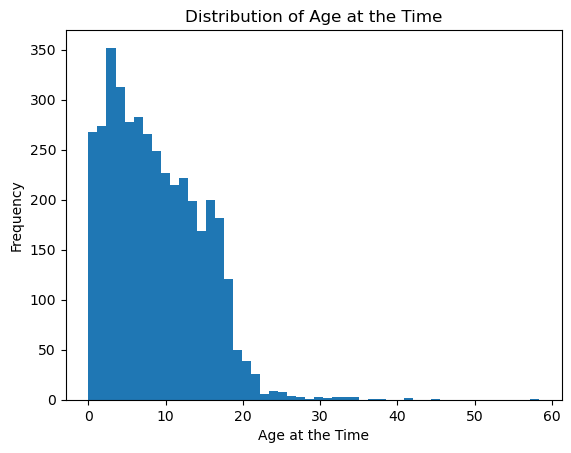

In [8]:
import matplotlib.pyplot as plt
plt.hist(sleep_study['AGE AT THE TIME'], bins=50)
plt.xlabel('Age at the Time')
plt.ylabel('Frequency')
plt.title('Distribution of Age at the Time')
plt.show()

In [9]:
SUM_PROCEDURE = pd.read_csv("/Users/lisonghe/Library/CloudStorage/OneDrive-JohnsHopkins/Semester 2/602 Research and Design in Data Mining/SUM data/SUM_PROCEDURE.csv")

In [10]:
SUM_PROCEDURE["STUDY_PAT_ID"].nunique()

3629

In [11]:
SUM_DEMOGRAPHIC = pd.read_csv("/Users/lisonghe/Library/CloudStorage/OneDrive-JohnsHopkins/Semester 2/602 Research and Design in Data Mining/SUM data/SUM_DEMOGRAPHIC.csv")

In [12]:
SUM_DEMOGRAPHIC["STUDY_PAT_ID"].nunique()

3673

In [13]:
SUM_DEMOGRAPHIC["STUDY_PAT_ID"].shape[0]

3673

In [14]:
SUM_SLEEP_STUDY = pd.read_csv("/Users/lisonghe/Library/CloudStorage/OneDrive-JohnsHopkins/Semester 2/602 Research and Design in Data Mining/files/SLEEP_STUDY.csv")

In [15]:
SUM_SLEEP_STUDY["STUDY_PAT_ID"].shape[0]

3984

In [16]:
SUM_SLEEP_STUDY["STUDY_PAT_ID"].nunique()

3673

In [17]:
SUM_PROCEDURE.shape[0]

9966

In [18]:
sleep_study = sleep_study.drop(columns='age_group')

In [19]:
sleep_study.head()

,STUDY_PAT_ID,SLEEP_STUDY_ID,AGE AT THE TIME,SLEEP_STUDY_DURATION_DATETIME
0,1,4789,9.145205,9:35:32
1,7,12595,2.123288,11:22:32
2,10,22339,13.101370,11:14:13
3,16,24241,12.076712,10:03:36
4,22,23233,4.739726,11:15:36


In [20]:
sleep_study.to_csv("SUM_SLEEP_STUDY.csv", index = False)

In [21]:
SUM_DEMOGRAPHIC.head()

,STUDY_PAT_ID,PCORI_GENDER_CD,RACE_DESCR
0,1,M,White
1,7,F,White
2,10,F,Black or African American
3,16,M,White
4,22,M,Black or African American


In [22]:
SUM_PROCEDURE.dropna(subset=['PROC_DESCR'], inplace=True)
SUM_PROCEDURE.to_csv("SUM_PROCEDURE.csv",index = False)

In [23]:
med = pd.read_csv("/Users/lisonghe/Library/CloudStorage/OneDrive-JohnsHopkins/Semester 2/602 Research and Design in Data Mining/files/MEDICATION.csv")
med_unique = med.drop_duplicates(subset=['STUDY_PAT_ID', 'MEDICATION_DESCR'])
med_unique = med_unique[['STUDY_PAT_ID', 'MEDICATION_DESCR']]

/var/folders/27/jq9bv3q96zl_n2fzdcprjnt40000gn/T/ipykernel_44524/1857263934.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  med = pd.read_csv("/Users/lisonghe/Library/CloudStorage/OneDrive-JohnsHopkins/Semester 2/602 Research and Design in Data Mining/files/MEDICATION.csv")


In [24]:
BMI_BP = pd.read_csv("/Users/lisonghe/Library/CloudStorage/OneDrive-JohnsHopkins/Semester 2/602 Research and Design in Data Mining/BMI_BP.csv")

In [25]:
merged_df1 = pd.merge(sleep_study, BMI_BP, on='SLEEP_STUDY_ID')
merged_df1 = merged_df1.rename(columns = {"STUDY_PAT_ID_x" : "STUDY_PAT_ID"})
merged_df = pd.merge(merged_df1, SUM_DEMOGRAPHIC, on='STUDY_PAT_ID')
merged_df.drop('STUDY_PAT_ID_y', axis=1, inplace=True)
merged_df = merged_df.rename(columns = {"AGE AT THE TIME" : "AGE"})
merged_df = merged_df.rename(columns = {"SLEEP_STUDY_DURATION_DATETIME" : "SLEEP_DURATION"})
merged_df = merged_df.rename(columns = {"PCORI_GENDER_CD" : "GENDER"})
merged_df = merged_df.rename(columns = {"RACE_DESCR" : "RACE", 'systolic blood pressure' : 'HIGH BP', 
                               'diastolic blood pressure' : 'LOW BP'})
# grouped = merged_df.groupby('STUDY_PAT_ID').apply(lambda x: {
#     'gender': x['PCORI_GENDER_CD'].iloc[0],
#     'race': x['RACE_DESCR'].iloc[0],
#     'study_ids': x['SLEEP_STUDY_ID'].tolist(),
#     'age_at_the_time': [round(age, 2) for age in x['AGE AT THE TIME']],
#     'sleep_study_duration': [time.strip() for time in x['SLEEP_STUDY_DURATION_DATETIME'].astype(str)],
#      'BMI':x['BMI'].tolist(),
#     'systolic blood pressure':x['systolic blood pressure'].tolist(),
#     'diastolic blood pressure':x['diastolic blood pressure'].tolist()
# }).to_dict()

# list(grouped.items())[:10]

In [26]:
merged_df.head(10)

,STUDY_PAT_ID,SLEEP_STUDY_ID,AGE,SLEEP_DURATION,HIGH BP,LOW BP,BMI,GENDER,RACE
0,1,4789,9.145205,9:35:32,105.0,65.0,17.37,M,White
1,7,12595,2.123288,11:22:32,120.0,54.0,15.63,F,White
2,10,22339,13.101370,11:14:13,127.0,70.0,31.75,F,Black or African American
3,16,24241,12.076712,10:03:36,102.0,65.0,16.17,M,White
4,22,23233,4.739726,11:15:36,86.0,52.0,18.04,M,Black or African American
5,25,18085,17.926027,12:52:22,146.0,96.0,46.87,M,White
6,25,10579,18.906849,10:22:20,124.0,79.0,48.45,M,White
7,28,15280,6.169863,10:34:00,NaN,NaN,16.10,M,White
8,31,4429,3.139726,11:09:32,88.0,61.0,16.22,F,Black or African American
9,37,14779,9.605479,9:53:30,141.0,101.0,38.76,M,White


In [27]:
merged_df.to_csv("merged.csv", index = False)

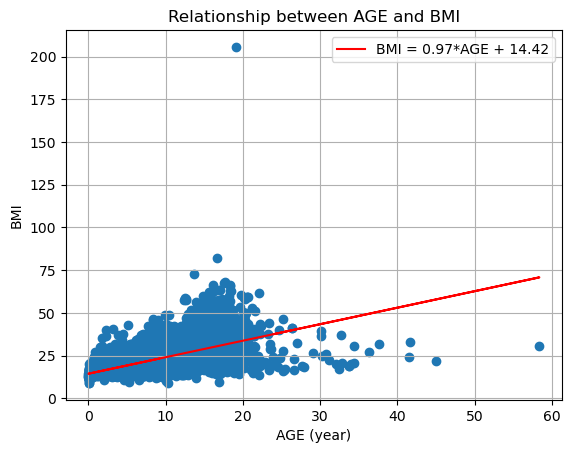

In [47]:
# BMI vs AGE
merged_df = pd.read_csv('/Users/lisonghe/Library/CloudStorage/OneDrive-JohnsHopkins/Semester 2/602 Research and Design in Data Mining/merged.csv')
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Fit a linear regression model
merged_df['SLEEP_DURATION'] = pd.to_timedelta(merged_df['SLEEP_DURATION'])
merged_df['SLEEP_MIN'] = merged_df['SLEEP_DURATION'].dt.total_seconds() / 60
clean_df = merged_df.dropna(subset=['AGE', 'BMI'])
X = clean_df[['AGE']]
y = clean_df['BMI'] 
model = LinearRegression()
model.fit(X, y)
slope = model.coef_[0]
intercept = model.intercept_
regression_line_expr = f'BMI = {slope:.2f}*AGE + {intercept:.2f}'
# Plot the regression line
predicted = model.predict(X)
plt.scatter(merged_df['AGE'], merged_df['BMI'])
plt.title('Relationship between AGE and BMI')
plt.xlabel('AGE (year)')
plt.ylabel('BMI')
plt.plot(clean_df['AGE'], predicted, color='red', label=regression_line_expr)
plt.grid(True)
plt.legend()
plt.show()

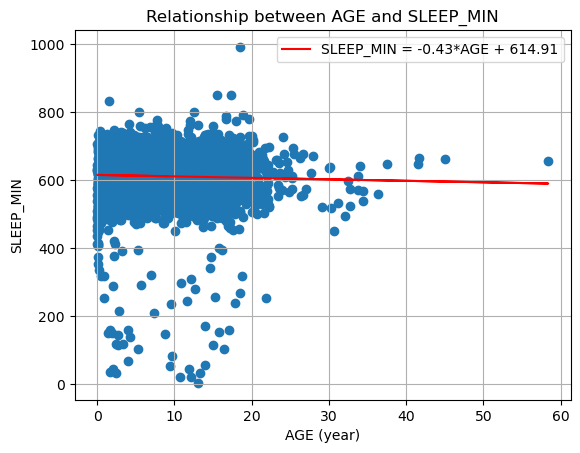

In [48]:
# SLEEP_MIN vs AGE
merged_df = pd.read_csv('/Users/lisonghe/Library/CloudStorage/OneDrive-JohnsHopkins/Semester 2/602 Research and Design in Data Mining/merged.csv')
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Fit a linear regression model
merged_df['SLEEP_DURATION'] = pd.to_timedelta(merged_df['SLEEP_DURATION'])
merged_df['SLEEP_MIN'] = merged_df['SLEEP_DURATION'].dt.total_seconds() / 60
clean_df = merged_df.dropna(subset=['AGE', 'SLEEP_MIN'])
X = clean_df[['AGE']]
y = clean_df['SLEEP_MIN'] 
model = LinearRegression()
model.fit(X, y)
slope = model.coef_[0]
intercept = model.intercept_
regression_line_expr = f'SLEEP_MIN = {slope:.2f}*AGE + {intercept:.2f}'
# Plot the regression line
predicted = model.predict(X)
plt.scatter(merged_df['AGE'], merged_df['SLEEP_MIN'])
plt.title('Relationship between AGE and SLEEP_MIN')
plt.xlabel('AGE (year)')
plt.ylabel('SLEEP_MIN')
plt.plot(clean_df['AGE'], predicted, color='red', label=regression_line_expr)
plt.grid(True)
plt.legend()
plt.show()

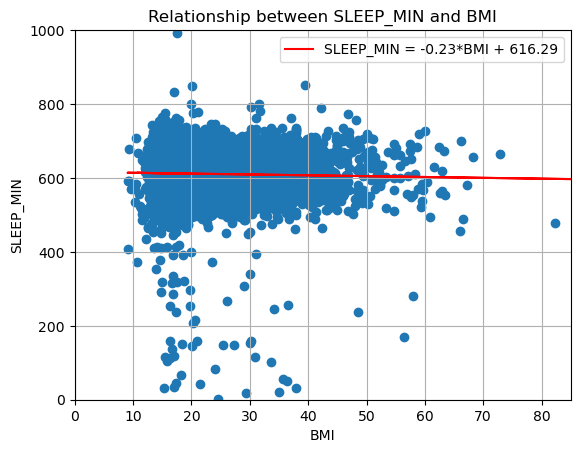

In [45]:
# SLEEP_MIN vs BMI
merged_df = pd.read_csv('/Users/lisonghe/Library/CloudStorage/OneDrive-JohnsHopkins/Semester 2/602 Research and Design in Data Mining/merged.csv')
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Fit a linear regression model
merged_df['SLEEP_DURATION'] = pd.to_timedelta(merged_df['SLEEP_DURATION'])
merged_df['SLEEP_MIN'] = merged_df['SLEEP_DURATION'].dt.total_seconds() / 60
clean_df = merged_df.dropna(subset=['BMI', 'SLEEP_MIN'])
X = clean_df[['BMI']]
y = clean_df['SLEEP_MIN'] 
model = LinearRegression()
model.fit(X, y)
slope = model.coef_[0]
intercept = model.intercept_
regression_line_expr = f'SLEEP_MIN = {slope:.2f}*BMI + {intercept:.2f}'
# Plot the regression line
predicted = model.predict(X)
plt.scatter(merged_df['BMI'], merged_df['SLEEP_MIN'])
plt.title('Relationship between SLEEP_MIN and BMI')
plt.xlabel('BMI')
plt.ylabel('SLEEP_MIN')
plt.plot(clean_df['BMI'], predicted, color='red', label=regression_line_expr)
plt.grid(True)
plt.legend()
plt.xlim(0, 85)  # Set x-axis limits from 0 to 100
plt.ylim(0, 1000)  # Set y-axis limits from 0 to 500
plt.show()

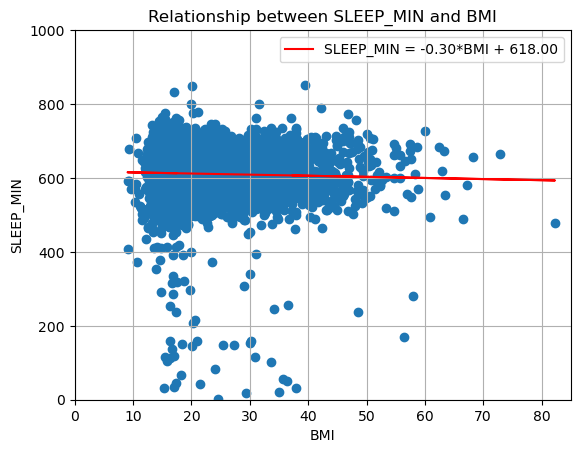

In [44]:
clean_df = merged_df.dropna(subset=['BMI', 'SLEEP_MIN'])
X = clean_df[['BMI']]
y = clean_df['SLEEP_MIN'] 
model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_
regression_line_expr = f'SLEEP_MIN = {slope:.2f}*BMI + {intercept:.2f}'
# Plot the regression line
predicted = model.predict(X)
plt.scatter(merged_df['BMI'], merged_df['SLEEP_MIN'])
plt.title('Relationship between SLEEP_MIN and BMI')
plt.xlabel('BMI')
plt.ylabel('SLEEP_MIN')
plt.plot(clean_df['BMI'], predicted, color='red', label=regression_line_expr)
plt.grid(True)
plt.legend()
plt.xlim(0, 85)  # Set x-axis limits from 0 to 100
plt.ylim(0, 1000)  # Set y-axis limits from 0 to 500
plt.show()

In [3]:
dg = pd.read_csv('/Users/lisonghe/Library/CloudStorage/OneDrive-JohnsHopkins/Semester 2/602 Research and Design in Data Mining/files/DIAGNOSIS.csv')

In [5]:
dg['DX_NAME'].str.contains("Apnea").sum()

2583

In [7]:
dg[dg['DX_NAME'].str.contains("Apnea")]

,Unnamed: 0,STUDY_DX_ID,STUDY_ENC_ID,STUDY_PAT_ID,DX_START_DATETIME,DX_END_DATETIME,DX_SOURCE_TYPE,DX_ENC_TYPE,DX_CODE_TYPE,DX_CODE,DX_NAME,DX_ALT_CODE,CLASS_OF_PROBLEM,CHRONIC_YN,PROV_ID
3494,3494,13798,56418598,8206,2015-10-24 14:33:00,2015-11-12 17:27:00,Final Dx,Final Dx,ICD10,R06.81,"Apnea, not elsewhere classified",NaN,NaN,NaN,3001366.0
3543,3543,13847,56795641,2263,2018-03-18 12:05:00,2018-03-23 14:59:00,Final Dx,Final Dx,ICD10,R06.81,"Apnea, not elsewhere classified",NaN,NaN,NaN,3001366.0
3762,3762,14088,56652670,13357,2019-01-21 00:00:00,2019-01-21 00:00:00,Secondary Encounter Dx,Encounter Dx,ICD10,R06.81,Apnea,786.03,NaN,NaN,3001366.0
3855,3855,14185,56484661,9838,2017-07-27 23:06:00,2017-07-30 14:41:00,Final Dx,Final Dx,ICD10,R06.81,"Apnea, not elsewhere classified",NaN,NaN,NaN,3001366.0
3945,3945,14275,56444992,11458,2019-07-30 00:00:00,2019-07-30 00:00:00,Secondary Encounter Dx,Encounter Dx,ICD10,R06.81,Apnea in pediatric patient,786.03,NaN,NaN,3001366.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508999,1508999,1642718,55526353,13717,2011-05-13 00:00:00,2011-08-29 00:00:00,Resolved,Problem List Dx,ICD9,770.82,Apnea of prematurity,P28.4,NaN,N,NaN
1509007,1509007,1642726,55526353,13717,2011-05-13 00:00:00,2011-08-29 00:00:00,Resolved,Problem List Dx,ICD9,765.10,Apnea of prematurity,P28.4,NaN,N,NaN
1509203,1509203,1642930,55765828,6595,2012-03-25 00:00:00,2012-04-04 00:00:00,Resolved,Problem List Dx,ICD9,770.82,Apnea of prematurity,P28.4,NaN,N,NaN
1509207,1509207,1642934,55765828,6595,2012-03-25 00:00:00,2012-04-04 00:00:00,Resolved,Problem List Dx,ICD9,765.10,Apnea of prematurity,P28.4,NaN,N,NaN
